In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Import all libraries:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Upload the Dataset:

In [3]:
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

# Data Exploration:

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


VARIÁVEIS NUMÉRICAS:

In [ ]:
#list(set(train_data.dtypes.tolist()))          -------- o que isso faz??

In [7]:
numerical = pd.DataFrame(train_data, columns=['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                              'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                              'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                                              'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                                              'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                                              'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'])
categorical = pd.DataFrame(train_data, columns=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
                                                'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                                                'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
                                                'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                                                'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                                'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
                                                'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                                                'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
                                                'SaleCondition'])

array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>],
       [<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>],
       [<AxesSubplot:title={'center':'Kitchen

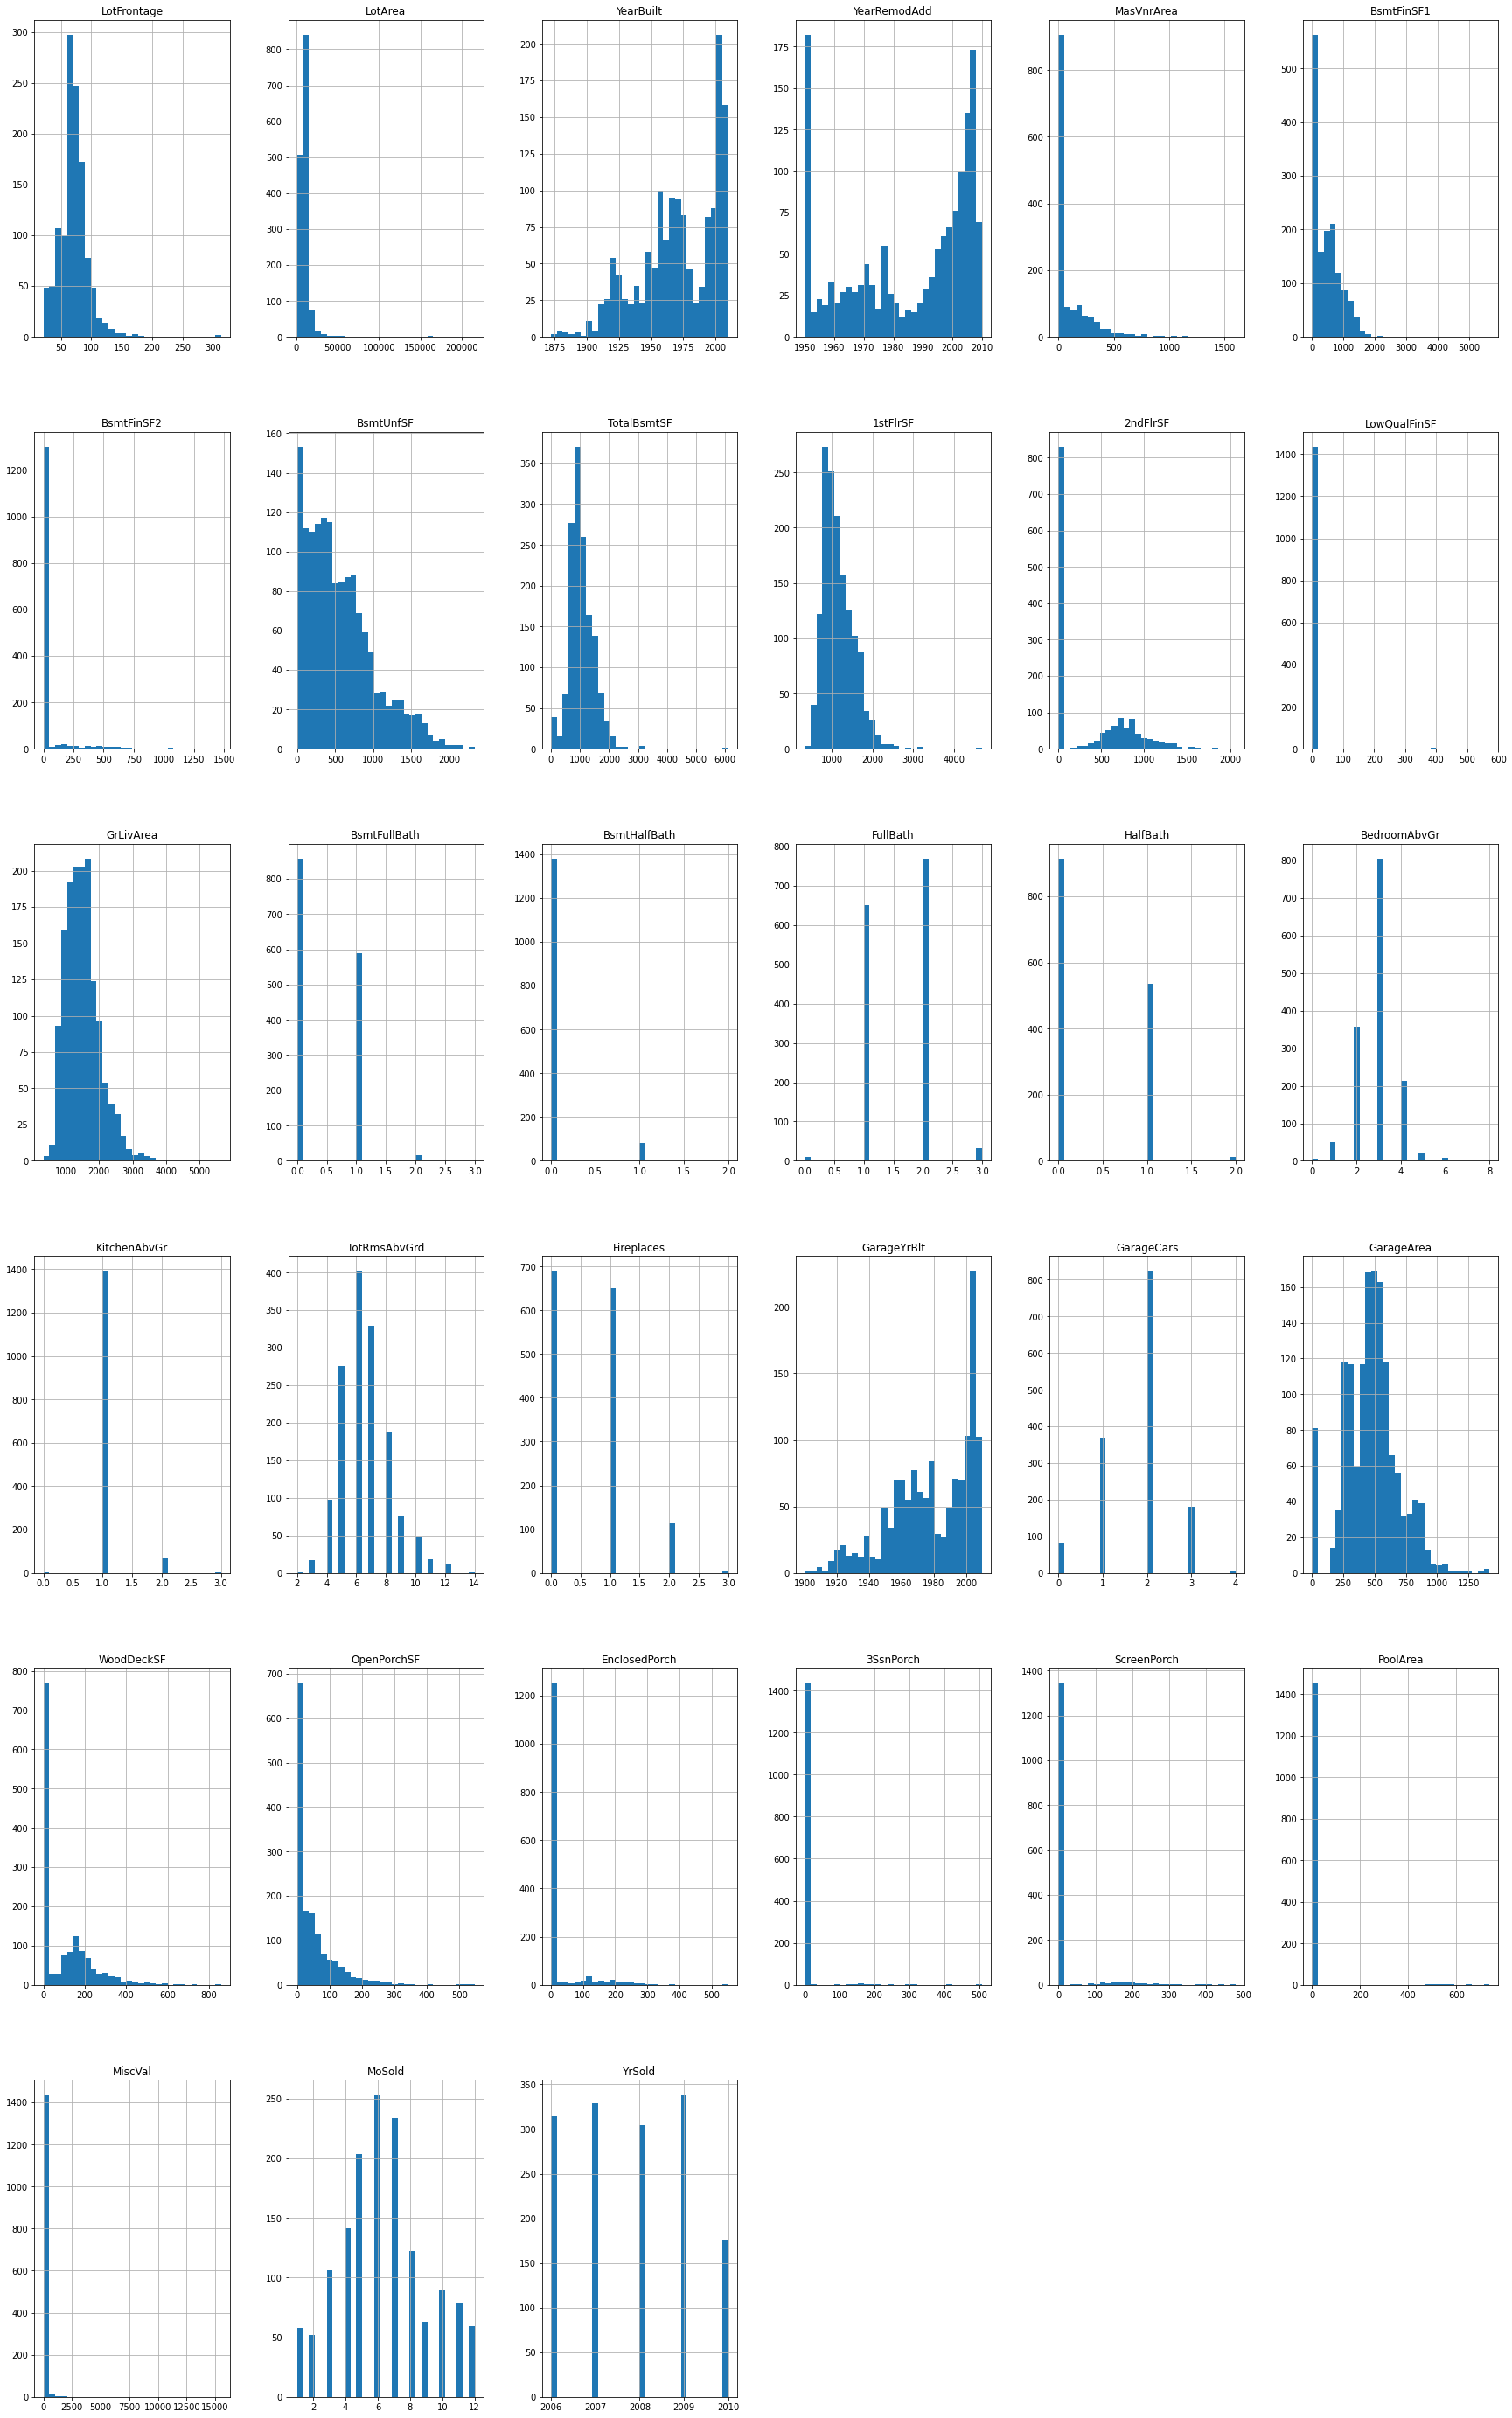

In [8]:
numerical.hist(figsize=(30,50),bins=30)

Com base na análise dos histogramas, decidiu-se por remover as variáveis que possivelmente teriam pouco impacto na análise estatística, por terem muitos valores em uma das categorias e pouquíssimos nas demais. Serão removidas as seguintes variáveis numéricas:

'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'

In [ ]:
# COMO FAZER GRÁFICOS COM CONTAGEM DE DADOS CATEGÓRICOS?

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


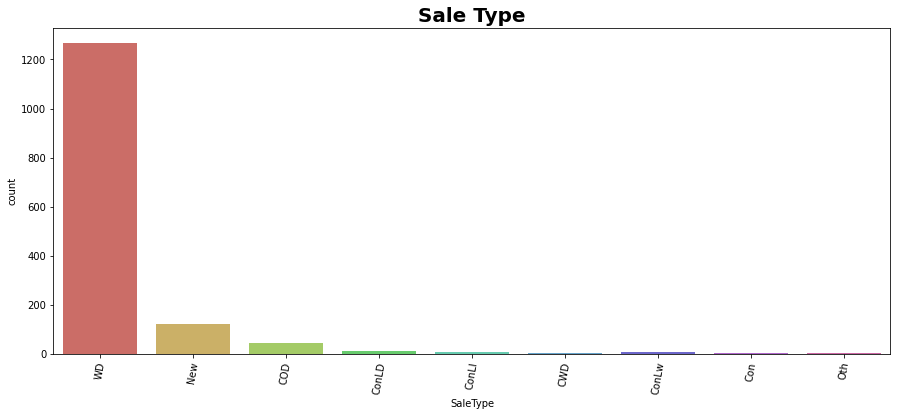

In [10]:
plt.figure(figsize=(15,6))
plt.title('Sale Type', fontsize=20, fontweight='bold')
sns.countplot(train_data['SaleType'], data = train_data, 
             palette = 'hls')
plt.xticks(rotation = 80)
plt.show()


In [11]:
categorical.shape[1] #quantas colunas?

46

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

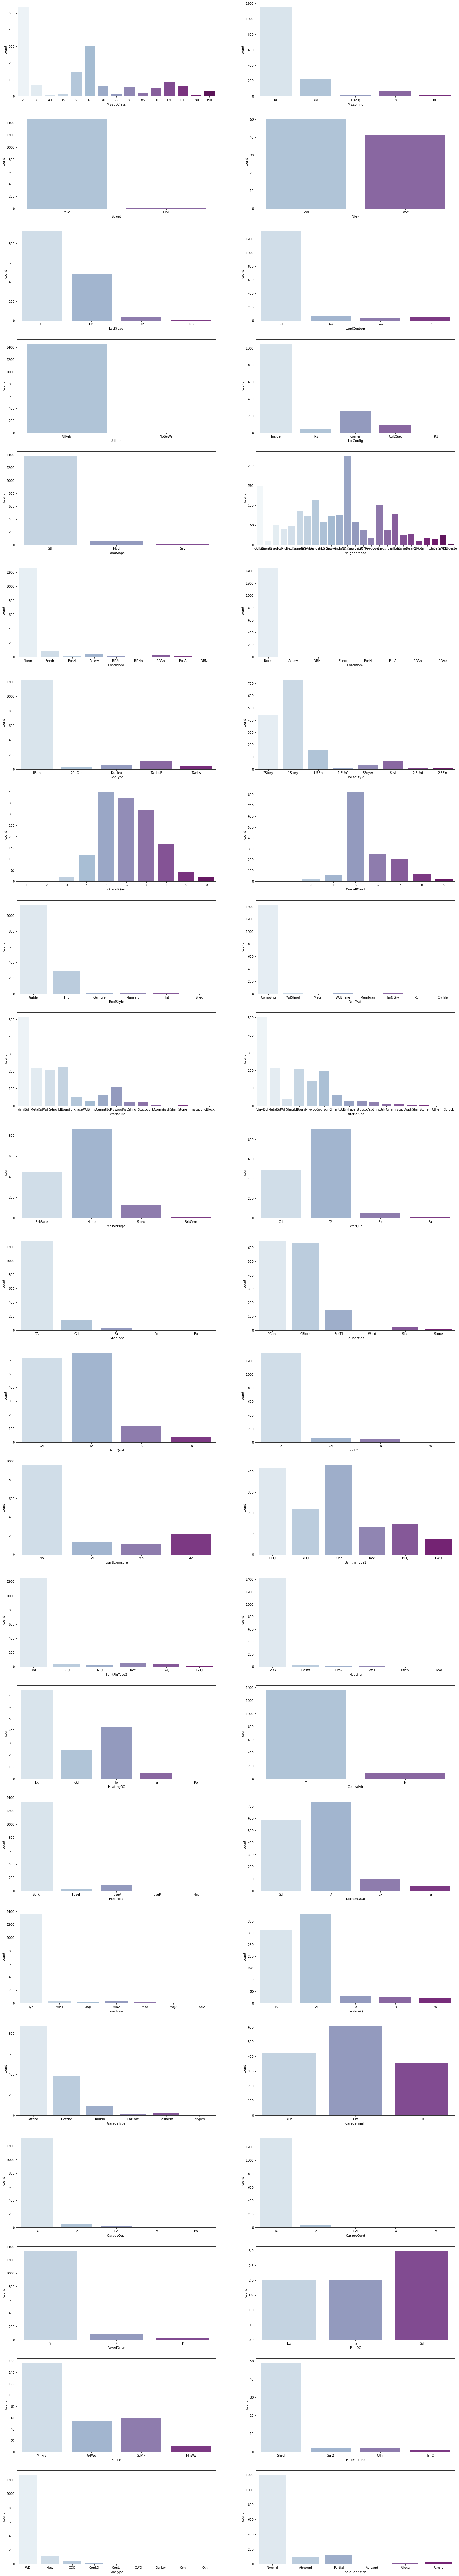

In [12]:
fig , ax = plt.subplots(23,2, figsize = (25,150))     # set up 23 x 2 frame count plot (total 46 columns)
for i, subplots in zip(categorical, ax.flatten()):  
  sns.countplot(categorical[i],ax = subplots, palette = 'BuPu')
plt.show()

Com base na análise dos *countplots*, decidiu-se por remover as variáveis que possivelmente teriam pouco impacto na análise estatística, por terem muitos valores em uma das categorias e pouquíssimos nas demais. Serão removidas as seguintes variáveis categóricas:

'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating',  'Electrical',  'Functional',  'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition'


<AxesSubplot:>

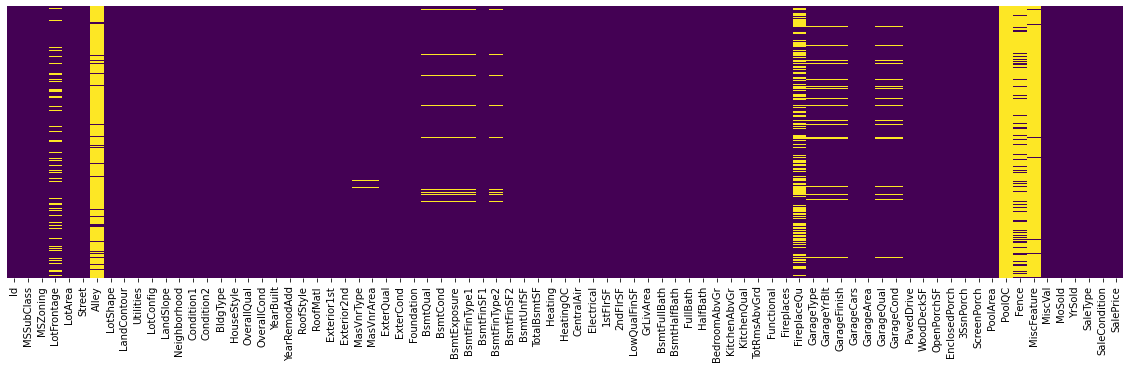

In [13]:
plt.figure(figsize=(20,5))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Após a análise do *heatmap* acima, optou-se por remover também as variáveis com muitos valores nulos (além das já descritas abaix, e também a variável de identificação (Id), que não teria nenhum valor na análise.
*'Id', 'Alley', 'FireplaceQu', 'PoolQc', 'Fence'*

**REMOVER - Var. Numéricas:**
'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'

**REMOVER - Var. Categóricas:**
'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond',
'BsmtFinType2', 'Heating',  'Electrical',  'Functional',  'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition'

# Factors that that influence a home’s value
1. Neighborhood comps
2. Location
3. Home size and usable space
4. Age and condition
5. Upgrades and updates
6. The local market
7. Economic indicators
8. Interest rates

In [ ]:
#transformar para data?? YearBuilt, YearRemodAdd

In [ ]:
#remover colunas
del_col = ['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1',
           'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'Electrical', 'Functional',
           'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition', 'BsmtFinSF2', 'LowQualFinSF',
           'BsmtHalfBath', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
             
train_data.drop(del_col,axis=1,inplace=True)

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# isna
print('GarageType:', train_data['GarageType'].isna().sum())
print('GarageFinish:', train_data['GarageFinish'].isna().sum())
print('MasVnrType:', train_data['MasVnrType'].isna().sum())
print('BsmtQual:', train_data['BsmtQual'].isna().sum())
print('BsmtExposure:', train_data['BsmtExposure'].isna().sum())
print('BsmtFinType1:', train_data['BsmtFinType1'].isna().sum())

# isnull
print(train_data['GarageType'].isnull().sum())
print(train_data['GarageFinish'].isnull().sum())
print(train_data['MasVnrType'].isnull().sum())
print(train_data['BsmtQual'].isnull().sum())
print(train_data['BsmtExposure'].isnull().sum())
print(train_data['BsmtFinType1'].isnull().sum())

***É melhor preencher esses valores com No/NA? Ou remover essas linhas?***

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage


****-----------------------------------****

In [ ]:
#preencher com none/no:
train_data['MasVnrType'].fillna("None", inplace=True)
train_data['BsmtQual'].fillna("No", inplace=True)
train_data['BsmtExposure'].fillna("No", inplace=True)
train_data['BsmtFinType1'].fillna("NA", inplace=True)
train_data['GarageType'].fillna("NA", inplace=True)
train_data['GarageFinish'].fillna("NA", inplace=True)

In [ ]:
#preencher nulos com média: LotFrontage,MasVnrArea
train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean(), inplace=True)
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mean(), inplace=True)
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean(), inplace=True)
train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mean(), inplace=True)
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mean(), inplace=True)

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train_data.columns

ANÁLISE EXPLORATÓRIA:
- Valor de venda das casas por ano;
- Valor de venda das casas por região;
- Valor de venda das casas por quantidade de quartos;
- Valor de venda das casas por "idade";
- Valor de venda por área do lote;


In [ ]:
train_data = pd.get_dummies(data=train_data, columns=['MSZoning', 'Street', 'LandContour', 'Utilities', 'BldgType', 'MasVnrType',
                                              'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'Heating', 'HeatingQC', 'CentralAir',
                                              'Electrical', 'KitchenQual', 'GarageCond', 'PavedDrive', 'SaleType',
                                              'SaleCondition', 'OverallCond'], drop_first=True)



In [ ]:
list(train_data.columns)

In [ ]:
list(train_data.columns)

**ANÁLISE GRÁFICA - CORRELAÇÕES ENTRE AS VARIÁVEIS**

In [ ]:
sns.displot(train_data['SalePrice'],kde=True,bins=30)

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(),cmap='coolwarm')
plt.title('House Prices - Correlation')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = train_data['SalePrice']
X = train_data.drop(['SalePrice'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

**REGRESSÃO LINEAR**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

In [ ]:
# print the intercept
print(lm.intercept_)

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

In [ ]:
print(classification_report(y_test,rfc_pred))